In [36]:
import os

from time import sleep
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.firefox_profile import FirefoxProfile

from IPython import display
from base64 import b64decode

In [37]:
DOWNLOAD_TIMEOUT = 15

url = "https://tabs.ultimate-guitar.com/tab/linkin-park/faint-guitar-pro-224026"
destination = os.path.abspath(".\\tabs")
options = Options()
options.headless = True

options.set_preference("browser.download.folderList", 2)
options.set_preference("browser.download.manager.showWhenStarting", False)
options.set_preference("browser.download.dir", destination)
options.set_preference(
    "browser.helperApps.neverAsk.saveToDisk",
    "application/octet-stream"
)

driver = webdriver.Firefox(
    options=options,
    executable_path="geckodriver.exe"
)
driver.get(url)

C:\Users\User\AppData\Local\Temp\ipykernel_11876\1948571939.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(


In [38]:
help(driver.find_element)

Help on method find_element in module selenium.webdriver.remote.webdriver:

find_element(by='id', value=None) -> selenium.webdriver.remote.webelement.WebElement method of selenium.webdriver.firefox.webdriver.WebDriver instance
    Find an element given a By strategy and locator.
    
    :Usage:
        ::
    
            element = driver.find_element(By.ID, 'foo')
    
    :rtype: WebElement



In [39]:
button = driver.find_element(
    by="xpath",
    value='//button/span[text()="DOWNLOAD Guitar Pro TAB" '
          'or text()="DOWNLOAD Power TAB"]'
)

In [40]:
driver.execute_script("arguments[0].click();", button)

In [41]:
help(driver.execute_script)

Help on method execute_script in module selenium.webdriver.remote.webdriver:

execute_script(script, *args) method of selenium.webdriver.firefox.webdriver.WebDriver instance
    Synchronously Executes JavaScript in the current window/frame.
    
    :Args:
     - script: The JavaScript to execute.
     - \*args: Any applicable arguments for your JavaScript.
    
    :Usage:
        ::
    
            driver.execute_script('return document.title;')



In [42]:
button.text

'DOWNLOAD GUITAR PRO TAB'

In [43]:
form = driver.find_element(
    by="xpath",
    value='//form[@action="https://tabs.ultimate-guitar.com/tab/download"]'
)

In [44]:
help(form)

Help on WebElement in module selenium.webdriver.remote.webelement object:

class WebElement(BaseWebElement)
 |  WebElement(parent, id_)
 |  
 |  Represents a DOM element.
 |  
 |  Generally, all interesting operations that interact with a document will be
 |  performed through this interface.
 |  
 |  All method calls will do a freshness check to ensure that the element
 |  reference is still valid.  This essentially determines whether or not the
 |  element is still attached to the DOM.  If this test fails, then an
 |  ``StaleElementReferenceException`` is thrown, and all future calls to this
 |  instance will fail.
 |  
 |  Method resolution order:
 |      WebElement
 |      BaseWebElement
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, element)
 |      Return self==value.
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __init__(self, parent, id_)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ne__(self, elem

In [45]:
form.submit()

In [46]:
driver

<selenium.webdriver.firefox.webdriver.WebDriver (session="8399ccb6-06f3-4fdd-9b8d-c7c3f9825077")>

In [47]:
help(driver)

Help on WebDriver in module selenium.webdriver.firefox.webdriver object:

class WebDriver(selenium.webdriver.remote.webdriver.WebDriver)
 |  WebDriver(firefox_profile=None, firefox_binary=None, capabilities=None, proxy=None, executable_path='geckodriver', options=None, service_log_path='geckodriver.log', service_args=None, service=None, desired_capabilities=None, log_path=None, keep_alive=True)
 |  
 |  Controls a browser by sending commands to a remote server.
 |  This server is expected to be running the WebDriver wire protocol
 |  as defined at
 |  https://github.com/SeleniumHQ/selenium/wiki/JsonWireProtocol
 |  
 |  :Attributes:
 |   - session_id - String ID of the browser session started and controlled by this WebDriver.
 |   - capabilities - Dictionary of effective capabilities of this browser session as returned
 |       by the remote server. See https://github.com/SeleniumHQ/selenium/wiki/DesiredCapabilities
 |   - command_executor - remote_connection.RemoteConnection object us

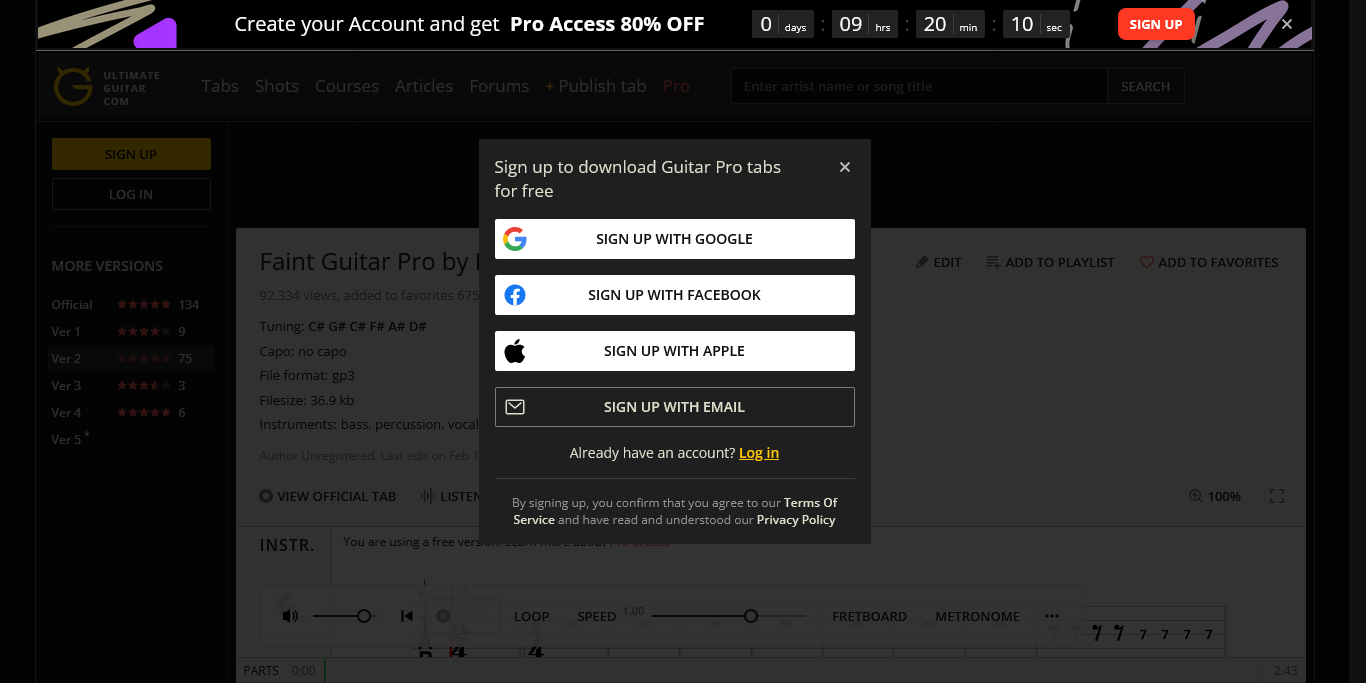

In [48]:
display.Image(b64decode(driver.get_screenshot_as_base64()))

Всё правильно, нужно залогиниться:

In [49]:
def screenshot(driver):
    return display.Image(b64decode(driver.get_screenshot_as_base64()))

In [50]:
driver.get("https://www.ultimate-guitar.com/")
login_btn = driver.find_element(
    by="xpath",
    value='//button[@class="rPQkl yDkT4 IxFbd exTWY lTEpj qOnLe QlmHX"]'
)
login_btn.click()

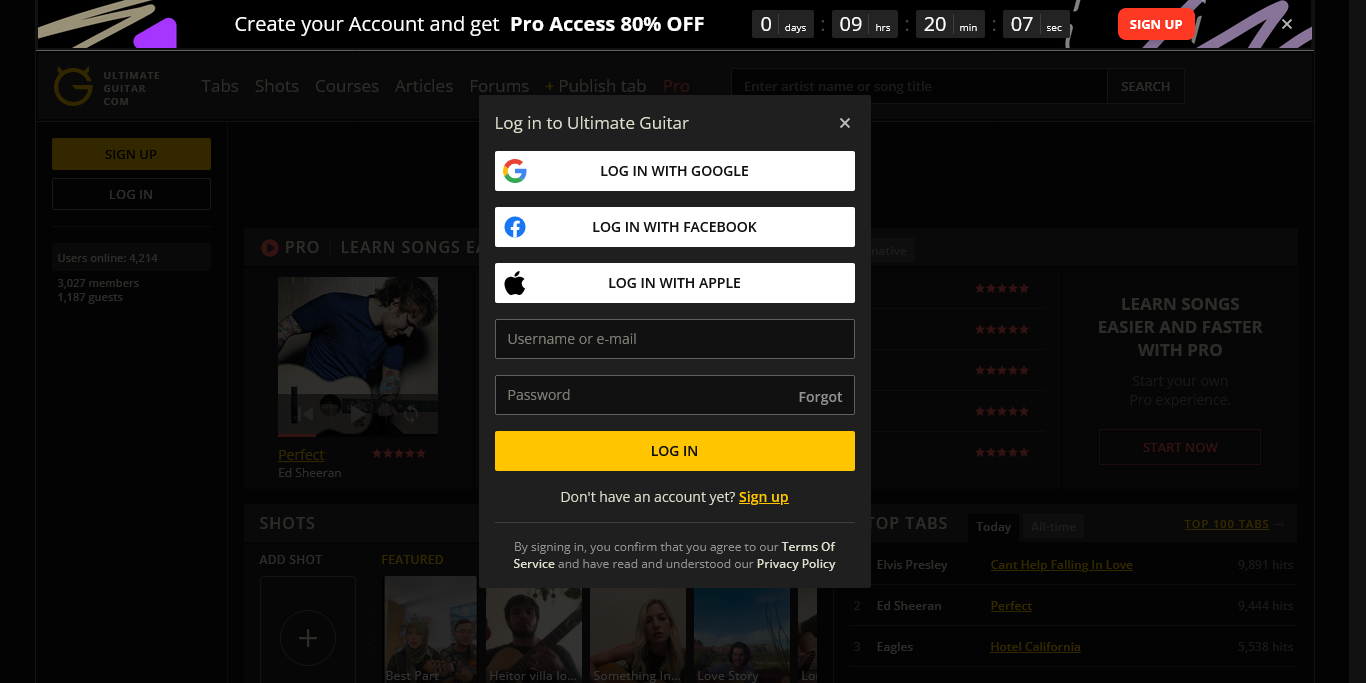

In [51]:
screenshot(driver)

In [52]:
#<button type="button" class="rPQkl yDkT4 IxFbd exTWY lTEpj qOnLe QlmHX"><span class="KNVWh _sWeD">Log in</span></button>

In [53]:
form = driver.find_element(
    by="xpath",
    value='//form[@class=""]'
)

Нужные нам поля - username, password:

In [54]:
uname = form.find_element(by="name", value="username")
pwd = form.find_element(by="name", value="password")

In [55]:
uname.screenshot("uname.png")

True

In [56]:
from tests.auth import USERNAME, PASSWORD

In [57]:
uname.send_keys(USERNAME)
pwd.send_keys(PASSWORD)

In [58]:
form.submit()

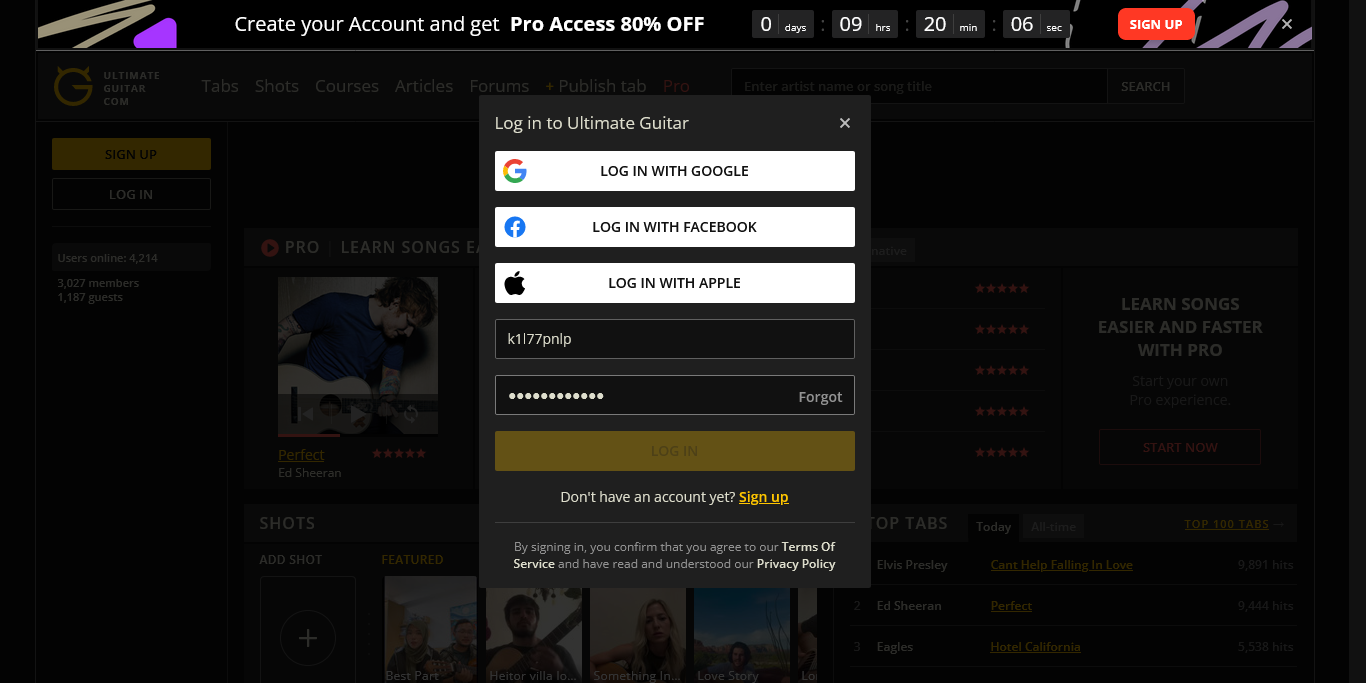

In [59]:
screenshot(driver)

Отлично-отлично, теперь попробуем выгрузить таб:

In [60]:
driver.get(url)
form = driver.find_element(
    by="xpath",
    value='//form[@action="https://tabs.ultimate-guitar.com/tab/download"]'
)
form.submit()

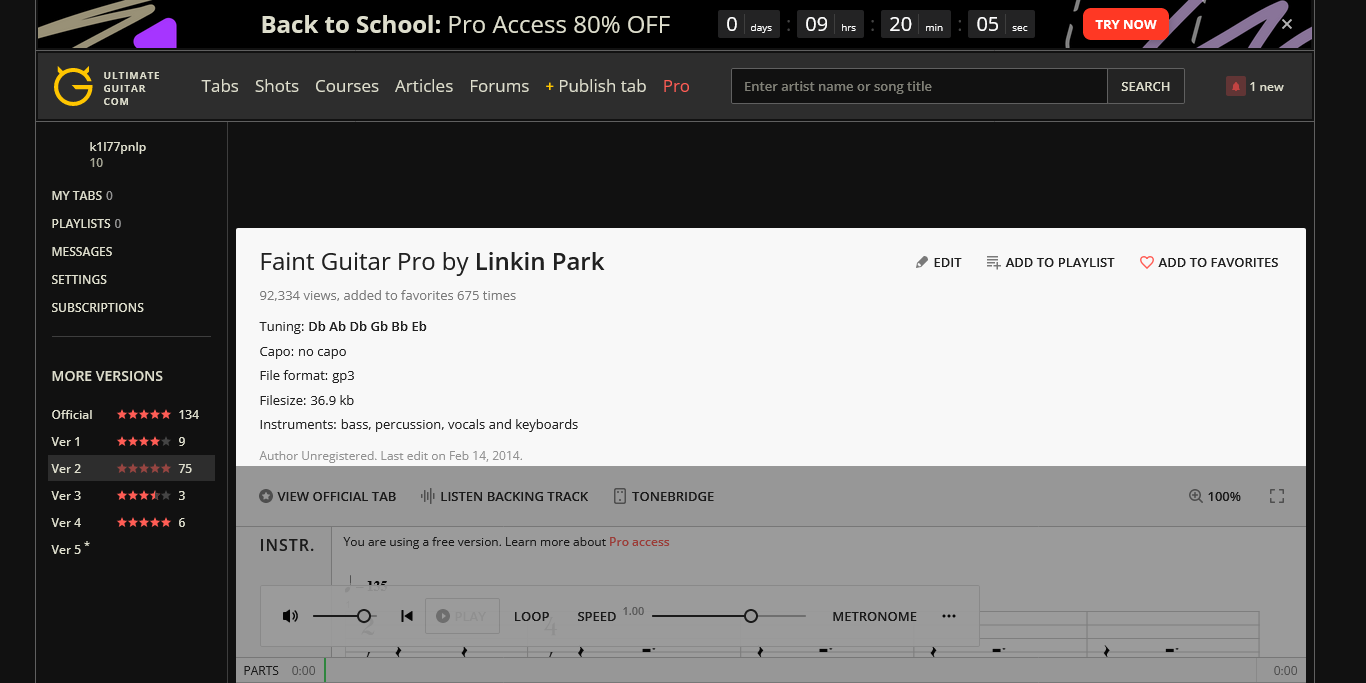

In [61]:
screenshot(driver)

In [62]:
driver.quit()

Теперь перепишем в виде класса:

In [63]:
class UGDownloader:
    def __init__(self, username: str, password: str, directory: str, geckopath: str = "geckodriver.exe"):
        self.username = username
        self.password = password
        self.directory = os.path.abspath(directory)
        self.geckopath = geckopath

        self.init_driver()
        self.login()

    def init_driver(self):
        options = Options()
        options.headless = True

        options.set_preference("browser.download.folderList", 2)
        options.set_preference("browser.download.manager.showWhenStarting", False)
        options.set_preference("browser.download.dir", self.directory)
        options.set_preference(
            "browser.helperApps.neverAsk.saveToDisk",
            "application/octet-stream"
        )

        self.driver = webdriver.Firefox(
            options=options,
            executable_path=self.geckopath
        )
        return driver

    def login(self):
        # click login button
        self.driver.get("https://www.ultimate-guitar.com/")
        login_btn = self.driver.find_element(
            by="xpath",
            value='//button[@class="rPQkl yDkT4 IxFbd exTWY lTEpj qOnLe QlmHX"]'
        )
        login_btn.click()

        # wait for JS to work
        sleep(0.5)

        #send login data
        form = self.driver.find_element(
            by="xpath",
            value='//form[@class=""]'
        )
        form.find_element(by="name", value="username").send_keys(self.username)
        form.find_element(by="name", value="password").send_keys(self.password)
        form.submit()

        sleep(2.0)

    def download_tab_by_url(self, url: str):
        self.driver.get(url)
        form = self.driver.find_element(
            by="xpath",
            value='//form[@action="https://tabs.ultimate-guitar.com/tab/download"]'
        )
        form.submit()

    def close(self):
        self.driver.quit()

In [64]:
ugd = UGDownloader(USERNAME, PASSWORD, "tabs")

C:\Users\User\AppData\Local\Temp\ipykernel_11876\684189996.py:23: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  self.driver = webdriver.Firefox(


In [67]:
ugd.login()

NoSuchElementException: Message: Unable to locate element: //button[@class="rPQkl yDkT4 IxFbd exTWY lTEpj qOnLe QlmHX"]
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.jsm:12:1
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.jsm:404:5
element.find/</<@chrome://remote/content/marionette/element.js:291:16


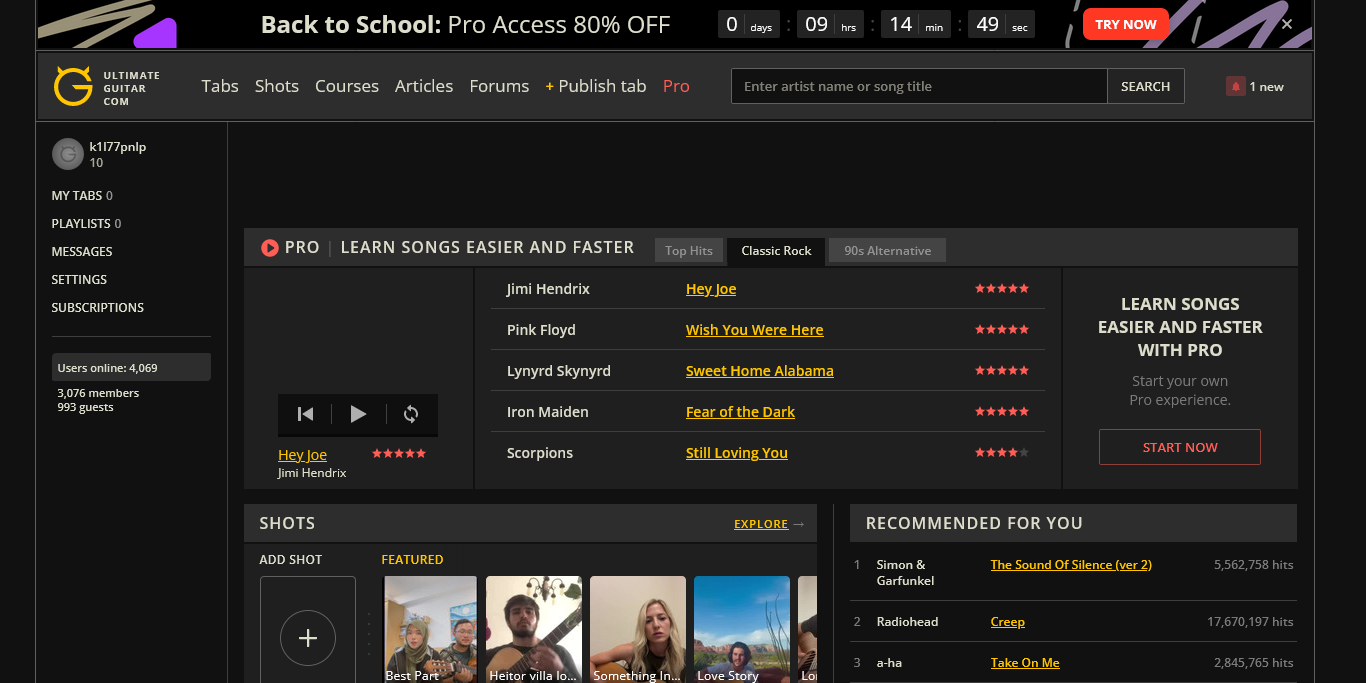

In [68]:
screenshot(ugd.driver)

In [71]:
ugd.driver.close()

In [42]:
btn_class="RwBUh rPQkl yDkT4 F3LT5 lTEpj qOnLe QlmHX"
ugd.driver.find_element(
    by="xpath",
    value=f'//button[@class="{btn_class}"]'
).click()

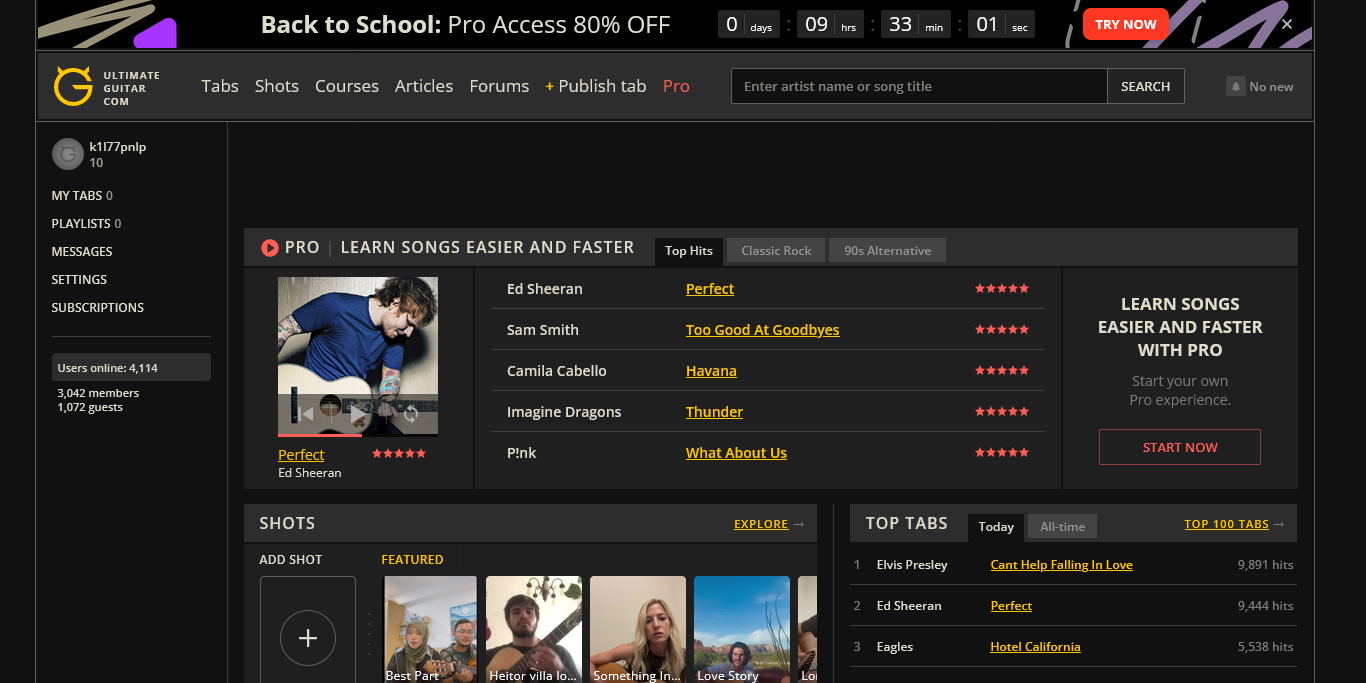

In [43]:
screenshot(ugd.driver)

In [53]:
url

'https://tabs.ultimate-guitar.com/tab/linkin-park/faint-guitar-pro-224026'

In [54]:
ugd.download_tab_by_url(url)

In [55]:
ugd.close()